In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("train.csv",index_col = "PassengerId")

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
def preprocessing(data):
    data = data.drop(["Name","Cabin"],axis = 1)
    data['Sex'] = pd.get_dummies(data['Sex'],drop_first =True)
    data['Age'].fillna(df['Age'].mean(),inplace = True)
    embark = pd.get_dummies(df['Embarked'])
    data = pd.concat([data,embark],axis=1)
    data = data.drop(['Embarked','Ticket'],axis=1)
    return data
preprocessing(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,0,0,1
2,1,1,0,38.000000,1,0,71.2833,1,0,0
3,1,3,0,26.000000,0,0,7.9250,0,0,1
4,1,1,0,35.000000,1,0,53.1000,0,0,1
5,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,0,0,1
888,1,1,0,19.000000,0,0,30.0000,0,0,1
889,0,3,0,29.699118,1,2,23.4500,0,0,1


In [6]:
processed = preprocessing(df)
processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   C         891 non-null    uint8  
 8   Q         891 non-null    uint8  
 9   S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 52.2 KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

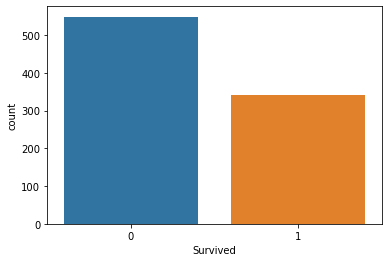

In [10]:
sns.countplot(x=processed['Survived'])

In [16]:
x = processed.drop(['Survived'],axis =1)
y = processed['Survived']
x

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,
1,3,1,22.000000,1,0,7.2500,0,0,1
2,1,0,38.000000,1,0,71.2833,1,0,0
3,3,0,26.000000,0,0,7.9250,0,0,1
4,1,0,35.000000,1,0,53.1000,0,0,1
5,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
887,2,1,27.000000,0,0,13.0000,0,0,1
888,1,0,19.000000,0,0,30.0000,0,0,1
889,3,0,29.699118,1,2,23.4500,0,0,1


In [17]:
from imblearn.over_sampling import SMOTE
balancing = SMOTE(sampling_strategy='minority',random_state = 16)
x_variant,y_variant = balancing.fit_resample(x,y)
x_variant

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,22.000000,1,0,7.250000,0,0,1
1,1,0,38.000000,1,0,71.283300,1,0,0
2,3,0,26.000000,0,0,7.925000,0,0,1
3,1,0,35.000000,1,0,53.100000,0,0,1
4,3,1,35.000000,0,0,8.050000,0,0,1
...,...,...,...,...,...,...,...,...,...
1093,2,0,40.147222,0,0,19.141833,0,0,1
1094,3,0,29.699118,0,0,7.750000,0,1,0
1095,3,0,26.811669,0,0,7.925000,0,0,1
1096,1,0,48.459088,0,0,244.953153,1,0,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

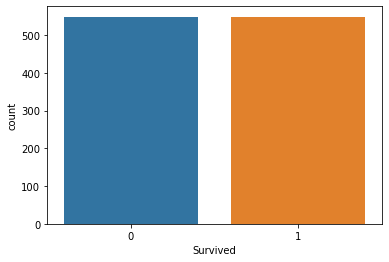

In [15]:
sns.countplot(x=y_variant)

In [25]:
from sklearn.preprocessing import MinMaxScaler
mapping = MinMaxScaler()
x_mapped = mapping.fit_transform(x_variant)
x_mapped

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.4722292 , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.33163695, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.60365781, ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.19356854, ..., 1.        , 0.        ,
        0.        ]])

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_mapped,y_variant,test_size = 0.1)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
models = {'KNN':KNeighborsClassifier,
          'Support Vector':SVC,
          'Naive bayes bernoulli':BernoulliNB,
          'Logistic Regression':LogisticRegression,
          'Random Forest':RandomForestClassifier,
          }
for _ in models:
    best = models[_]()
    best.fit(x_train,y_train)
    print(_)
    print(classification_report(y_test,best.predict(x_test)))

KNN
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        45
           1       0.84      0.88      0.86        65

    accuracy                           0.83       110
   macro avg       0.82      0.82      0.82       110
weighted avg       0.83      0.83      0.83       110

Support Vector
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        45
           1       0.89      0.83      0.86        65

    accuracy                           0.84       110
   macro avg       0.83      0.84      0.83       110
weighted avg       0.84      0.84      0.84       110

Naive bayes bernoulli
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        45
           1       0.80      0.85      0.82        65

    accuracy                           0.78       110
   macro avg       0.78      0.77      0.77       110
weighted avg       0.78      0.78

In [76]:
from sklearn.model_selection import GridSearchCV
params = [{'n_neighbors':[1,2,3,4,5],'algorithm':['ball_tree', 'kd_tree', 'brute']}]
knn = KNeighborsClassifier()
result = GridSearchCV(knn,params)
result.fit(x_train,y_train)
print(classification_report(y_test,result.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        45
           1       0.86      0.85      0.85        65

    accuracy                           0.83       110
   macro avg       0.82      0.82      0.82       110
weighted avg       0.83      0.83      0.83       110



In [77]:
x_test = pd.read_csv("test.csv",index_col = "PassengerId")
x_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [78]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [79]:
def pre_processing(detail):
    detail = detail.drop(["Name","Cabin"],axis = 1)
    detail['Sex'] = pd.get_dummies(detail['Sex'],drop_first =True)
    detail['Age'].fillna(detail['Age'].mean(),inplace = True)
    detail['Fare'].fillna(detail['Fare'].mean(),inplace = True)
    embark = pd.get_dummies(detail['Embarked'])
    detail = pd.concat([detail,embark],axis=1)
    detail = detail.drop(['Embarked','Ticket'],axis=1)
    return detail
pre_processing(x_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,
892,3,1,34.50000,0,0,7.8292,0,1,0
893,3,0,47.00000,1,0,7.0000,0,0,1
894,2,1,62.00000,0,0,9.6875,0,1,0
895,3,1,27.00000,0,0,8.6625,0,0,1
896,3,0,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
1305,3,1,30.27259,0,0,8.0500,0,0,1
1306,1,0,39.00000,0,0,108.9000,1,0,0
1307,3,1,38.50000,0,0,7.2500,0,0,1


In [80]:
processed_test = pre_processing(x_test)
processed_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    uint8  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
 6   C       418 non-null    uint8  
 7   Q       418 non-null    uint8  
 8   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 21.2 KB


In [81]:
x_mapped_test = mapping.transform(processed_test)
x_mapped_test

array([[1.        , 1.        , 0.4282483 , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.58532295, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.77381252, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.47851219, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.3751268 , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.3751268 , ..., 1.        , 0.        ,
        0.        ]])

In [111]:
report = pd.DataFrame(x_test.index)
report["Survived"] = result.predict(x_mapped_test)

In [112]:
report

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [114]:
report.to_csv("submission.csv",index = False)